In [7]:
from openpyxl import load_workbook
import numpy as np
import csv 
import os
import matplotlib.pyplot as plt
import pandas as pd 
import glob as glob
from scipy import stats
#import ggplot as gg


In [8]:
DIR="/NAS/deathrow/protocoles/predistim/"
PATH_SCRIPT=DIR+"code/"
LOG_DIR=PATH_SCRIPT+"log/" #pour les sorties de qbatch
VB_DATA_PATH=DIR+"volbrain/"
T1_DATA_PATH=DIR+"2018-07-30_t1_segmentations/"
MULTIGRE_DATA_PATH=DIR+"2018-12-12_3dmultigre/"
FS_PATH=DIR+"FS60_VB/"
PATH_SCREENSHOT=DIR+"screenshots/"
MNI152_PATH="/home/global/fsl5011/data/standard/MNI152_T1_1mm.nii.gz"

# Construction de carte moyenne

R2

In [ ]:
wb = load_workbook(filename = DIR+'/R2_ind.xlsx')
sheet_ranges = wb['R2']
CMD="fslmaths "
nbFiles=0
for cpt in np.arange(1,700):
    cellScore='S'+str(cpt)
    cellName='A'+str(cpt)
    if ((str(sheet_ranges[cellName].value).startswith('01')) | (str(sheet_ranges[cellName].value).startswith('17')) | (str(sheet_ranges[cellName].value).startswith('19'))):
        if (sheet_ranges[cellScore].value == 5):
            NAME=sheet_ranges[cellName].value
            #FILE_SPM=MULTIGRE_DATA_PATH+NAME[0:2]+"/"+NAME+"/R2/wrR2.nii"
            #FILE_ANTS=MULTIGRE_DATA_PATH+NAME[0:2]+"/"+NAME+"/R2/NR2.nii"
            FILE_ANTS=MULTIGRE_DATA_PATH+NAME[0:2]+"/"+NAME+"/R2/R2_warped.nii.gz"
            if (os.path.isfile(FILE_ANTS)):                 
                if nbFiles==0 :
                    CMD=CMD+FILE_ANTS
                    nbFiles += 1
                else :
                    CMD=CMD+" -add "+FILE_ANTS
                    nbFiles += 1
                
CMD+=" -div "+str(nbFiles)+" "+DIR+"R2_ants.nii.gz"
print(CMD)
os.system(CMD)  

QSM

In [119]:
wb = load_workbook(filename = DIR+'/R2_ind.xlsx')
sheet_ranges = wb['R2']
for std_threshold in range(20,180,20):
    CMD="fslmaths "
    nbFiles=0
    nbFilesTot=0
    std401=[]
    std417=[]
    std419=[]
    for cpt in np.arange(1,700):
        cellScore='S'+str(cpt)
        cellName='A'+str(cpt)
        if ((str(sheet_ranges[cellName].value).startswith('01')) | (str(sheet_ranges[cellName].value).startswith('17')) | (str(sheet_ranges[cellName].value).startswith('19'))):
            #if (sheet_ranges[cellScore].value == 5):
            NAME=sheet_ranges[cellName].value
            FILE_SPM=MULTIGRE_DATA_PATH+NAME[0:2]+"/"+NAME+"/R2/QSM_warped.nii.gz"
            if (os.path.isfile(FILE_SPM)): 
                outputCmd = os.popen('fslstats ' + FILE_SPM +' -S','r')
                std=np.float(outputCmd.read())
                nbFilesTot += 1
                if (str(sheet_ranges[cellName].value).startswith('01')) :
                    std401.append(std)
                elif (str(sheet_ranges[cellName].value).startswith('17')) :
                    std417.append(std)
                elif (str(sheet_ranges[cellName].value).startswith('19')) :
                    std419.append(std)
                if (std<std_threshold) :
                    if nbFiles==0 :
                        CMD=CMD+FILE_SPM
                    else :
                        CMD=CMD+" -add "+FILE_SPM
                    nbFiles += 1

    CMD+=" -div "+str(nbFiles)+" "+DIR+"mean_QSM_std"+str(std_threshold)+".nii.gz"
    #print(CMD)
    #os.system(CMD) 

In [3]:
wb = load_workbook(filename = DIR+'/R2_ind.xlsx')
sheet_ranges = wb['R2']
for std_threshold in range(20,180,20):
    CMD="fslmaths "
    nbFiles=0
    nbFilesTot=0
    std401=[]
    std417=[]
    std419=[]
    for cpt in np.arange(1,700):
        cellScore='S'+str(cpt)
        cellName='A'+str(cpt)
        if ((str(sheet_ranges[cellName].value).startswith('01')) | (str(sheet_ranges[cellName].value).startswith('17')) | (str(sheet_ranges[cellName].value).startswith('19'))):
            NAME=sheet_ranges[cellName].value
            FILE_SPM=MULTIGRE_DATA_PATH+NAME[0:2]+"/"+NAME+"/R2/QSM_warped.nii.gz"
            if (os.path.isfile(FILE_SPM)): 
                outputCmd = os.popen('fslstats ' + FILE_SPM +' -S','r')
                std=np.float(outputCmd.read())
                nbFilesTot += 1        
                print(FILE_SPM + " " +std)

Recuperation des ecart-types pour les cartes R2

In [152]:
df = pd.DataFrame()
df['00'] = pd.pandas.Series(np.arange(1,300)) 
for site in ["01","02","05","06","07","08","09","11","14","17","18","19"]:
    std=[]
    print(site)
    file_names=glob.glob(MULTIGRE_DATA_PATH+site+'/*/R2/R2_warped.nii')
    for file_name in file_names :
        outputCmd = os.popen('fslstats ' + file_name +' -S','r')
        std.append(np.float(outputCmd.read()))
    df[site] = pd.pandas.Series(std) 
del df['00']
df.to_csv(DIR+'std_R2.csv', sep = '\t')

01
02
05
06
07
08
09
11
14
17
18
19


In [219]:
df_R2 = pd.read_csv(DIR+'std_R2.csv',index_col = 0,sep = '\t')
df_R2.describe()

,01,02,05,06,07,08,09,11,14,17,18,19
count,42.000000,29.000000,30.000000,68.000000,55.000000,28.000000,8.000000,25.000000,5.000000,68.000000,11.000000,27.000000
mean,21841.730707,10861.067374,14421.792121,3644.740677,2349.098065,2943.148793,33515.995895,12972.503020,12514.541870,16987.810150,28818.930694,7240.942904
std,33062.111956,23580.982335,30030.853767,6219.180635,7888.186646,4259.682740,41509.188688,16932.086865,7638.642526,30152.659328,32096.421020,4767.929119
min,10.788123,1241.696371,909.750867,99.957390,73.034869,45.640706,8289.555608,728.718252,3302.356081,45.668414,2449.125154,783.538663
25%,5380.904462,2586.913318,3912.470426,786.691981,459.237703,774.357826,12498.414078,2612.666718,7944.872181,3663.318108,7829.549861,3708.201220
50%,11904.516266,5046.739068,6386.075437,1428.766179,706.410834,1500.162206,13874.822919,6029.346147,13591.725115,6908.454848,18261.647107,6602.320769
75%,21921.566436,8398.535893,12157.264778,2799.761878,1133.318419,3428.012497,34520.039330,12811.220263,14082.292402,14831.346200,37631.382263,9622.405088
max,148387.562376,130090.643803,167272.853238,30751.586428,57781.926070,21984.365406,131065.182094,61353.531885,23651.463572,185124.429416,111057.138862,18924.165685


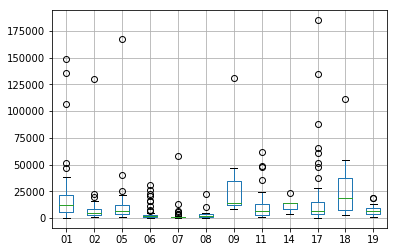

In [220]:
boxplot = df_R2.boxplot(column=["01","02","05","06","07","08","09","11","14","17","18","19"])
plt.show();

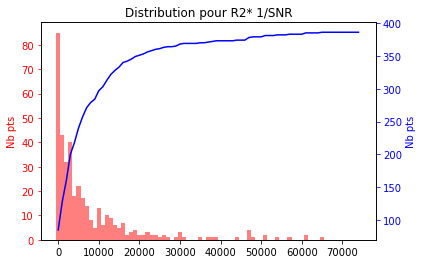

In [223]:
hist, bin_edges = np.histogram(df_R2.values, range=(0,75000),bins=75)
fig, ax1 = plt.subplots()
ax1.bar(bin_edges[:-1], hist, width=bin_edges[1]-bin_edges[0], color='red', alpha=0.5)
ax1.set_ylabel('Nb pts', color='r')
ax1.tick_params('y', colors='r')
ax2 = ax1.twinx()
dx = bin_edges[1] - bin_edges[0]
#cumulative = np.cumsum(hist)*dx
ax2.plot(bin_edges[:-1], np.cumsum(hist), c='blue')
ax2.set_ylabel('Nb pts', color='b')
ax2.tick_params('y', colors='b')
ax2.set_title('Distribution pour R2* 1/SNR')
plt.xlabel('1/SNR')
plt.savefig('Distribution_R2.png', bbox_inches='tight')
plt.show()

Recuperation des ecart-types pour les cartes QSM

In [150]:
df = pd.DataFrame()
df['00'] = pd.pandas.Series(np.arange(1,300)) 
for site in ["01","17","19"]:
    std=[]
    print(site)
    file_names=glob.glob(MULTIGRE_DATA_PATH+site+'/*/R2/QSM_warped.nii')
    for file_name in file_names :
        outputCmd = os.popen('fslstats ' + file_name +' -S','r')
        std.append(np.float(outputCmd.read()))
    df[site] = pd.pandas.Series(std) 
del df['00']
df.to_csv(DIR+'std_QSM.csv', sep = '\t')

01
17
19


In [160]:
df_QSM = pd.read_csv(DIR+'std_QSM.csv',index_col = 0,sep = '\t')
df_QSM.describe()

,01,17,19
count,35.000000,56.000000,24.000000
mean,54.749217,35.519171,50.137489
std,51.770004,35.636560,60.876085
min,17.362225,2.442114,4.262546
25%,24.487772,22.310173,25.865489
50%,30.001365,26.179989,34.433630
75%,52.449647,32.528342,55.776839
max,220.567927,241.087724,316.923005


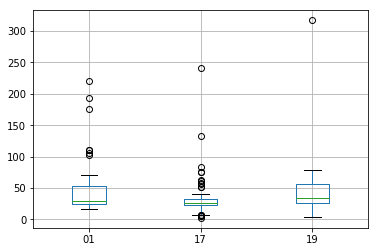

In [169]:
boxplot = df_QSM.boxplot(column=["01","17","19"])
plt.show();

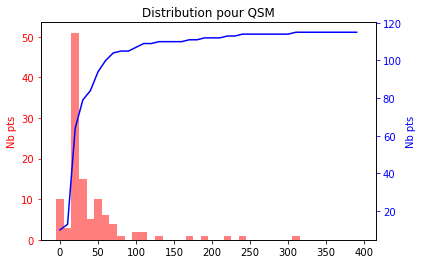

In [224]:
hist, bin_edges = np.histogram(df_QSM.values, range=(0,400),bins=40)
fig, ax1 = plt.subplots()
ax1.bar(bin_edges[:-1], hist, width=bin_edges[1]-bin_edges[0], color='red', alpha=0.5)
ax1.set_ylabel('Nb pts', color='r')
ax1.tick_params('y', colors='r')
ax2 = ax1.twinx()
dx = bin_edges[1] - bin_edges[0]
#cumulative = np.cumsum(hist)*dx
ax2.plot(bin_edges[:-1], np.cumsum(hist), c='blue')
ax2.set_ylabel('Nb pts', color='b')
ax2.tick_params('y', colors='b')
ax2.set_title('Distribution pour QSM')
plt.savefig('Distribution_QSM_PhilipsSites.png', bbox_inches='tight')
plt.show()

In [9]:
ClinicalData = pd.read_excel(DIR+'/Data_Cli.xlsx')
print(ClinicalData[ClinicalData.Patient ==  '01007HC'].DOPA)

5    78.7
Name: DOPA, dtype: float64


In [10]:
dopa_group=[]
file_names=glob.glob('/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/*/*/R2/QSM_warped.nii')
for file_name in file_names :
    ind=ClinicalData.loc[ClinicalData['Patient'] == file_name[60:67:1]].index.values.astype(int)
    if (np.shape(ind)[0]>0) :
        dopa_ind=ClinicalData.loc[int(ind)].at['DOPA']
        if (dopa_ind>0) :
            print("'"+file_name+",1'")
            dopa_group.append(dopa_ind)

'/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/01/01007HC/R2/QSM_warped.nii,1'
'/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/01/01008GM/R2/QSM_warped.nii,1'
'/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/01/01009WF/R2/QSM_warped.nii,1'
'/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/01/01010VD/R2/QSM_warped.nii,1'
'/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/01/01011BB/R2/QSM_warped.nii,1'
'/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/01/01012BB/R2/QSM_warped.nii,1'
'/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/01/01014DE/R2/QSM_warped.nii,1'
'/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/01/01016BP/R2/QSM_warped.nii,1'
'/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/01/01017TA/R2/QSM_warped.nii,1'
'/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/01/01018MT/R2/QSM_warped.nii,1'
'/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/01/01019LJ/R2/QSM_warped.nii,1'
'/NAS/deat

In [ ]:
wb = load_workbook(filename = DIR+'/R2_ind.xlsx')
sheet_ranges = wb['R2']
# 'V' 'X' 
for letter in ['X',"AE","AL","AS","AE","AZ","BG","BN","BU","CB","CI","CP","CW","DD","DK","DR","DY","EF","EM"] :
    val=[]
    #for letter in sheet_ranges.columns:
    for cpt in np.arange(3,448):
        cellScore=letter+str(cpt)
        if (sheet_ranges[cellScore].value > 0) :
            val.append(sheet_ranges[cellScore].value)
     
    plt.violinplot(np.array(val),showextrema=False)
    plt.boxplot(np.array(val))
    plt.show()


In [ ]:
wb1 = load_workbook(filename = DIR+'/R2_ind.xlsx')
sheet_ranges1 = wb1['R2']

wb2 = load_workbook(filename = DIR+'/DopaSensa.xlsx')
sheet_ranges2 = wb2['Dopa']

R2=[]
DOPA=[]
for cpt1 in np.arange(1,460):
    cellScore='S'+str(cpt1)
    cellName='A'+str(cpt1)
    #if (str(sheet_ranges[cellName].value).startswith('0')):
    #if ((str(sheet_ranges[cellName].value).startswith('01')) | (str(sheet_ranges[cellName].value).startswith('17')) | (str(sheet_ranges[cellName].value).startswith('19'))):
    #if (sheet_ranges[cellScore].value == 5):
        #print(sheet_ranges1[cellName].value)
    for cpt2 in np.arange(1,700):
        if (sheet_ranges1[cellName].value ==  sheet_ranges2['A'+str(cpt2)].value) :
            #if (sheet_ranges1['DR'+str(cpt1)].value is not None) and (sheet_ranges2['B'+str(cpt2)].value is not None) :
                print(str(sheet_ranges2['A'+str(cpt2)].value)+" "+str(sheet_ranges2['B'+str(cpt2)].value)+" "+str(sheet_ranges1['DR'+str(cpt1)].value)) 
                R2.append(sheet_ranges1['DR'+str(cpt1)].value)
                DOPA.append(sheet_ranges2['B'+str(cpt2)].value)

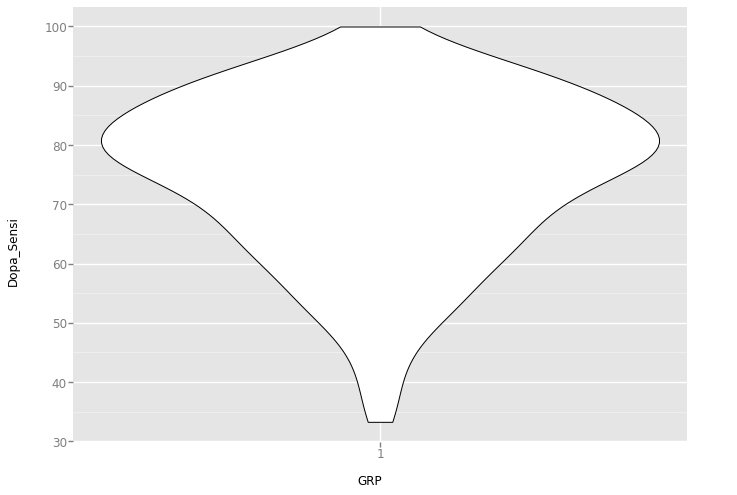

<ggplot: (8756196076777)>

In [157]:
p=gg.ggplot(df,gg.aes(x='GRP',y='Dopa_Sensi'))
p+gg.geom_violin(draw_quantiles = 0.25)
#plt.violinplot(np.array(DOPA),showextrema=False)
#plt.boxplot(np.array(DOPA))
#plt.show()

In [209]:
df_R2 = pd.read_csv(DIR+'results/SPM/R2_UPDRSIII_ON/UPDRSIII_ON_corr.txt',header=None,sep = ' ')
df_R2.describe()

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,0.0
mean,10.648501,30.047230,59.720460,55.172977,30.159712,45.668363,24.832328,41.034783,23.960737,48.587940,...,39.591964,28.901046,38.209146,35.124724,31.397387,26.778634,42.753555,43.812957,45.240441,NaN
std,7.652932,7.569944,119.680945,125.914551,13.240427,40.937822,11.510718,139.211897,11.328473,182.208018,...,57.105114,10.765338,36.848939,6.774163,71.128161,5.391878,16.932701,19.599058,21.855947,NaN
min,0.000000,3.010080,0.530054,0.919237,0.926577,0.000000,0.851809,3.049666,0.670993,1.074744,...,0.815213,0.963210,0.816457,3.159402,1.827151,1.713018,2.515513,1.918691,1.981866,NaN
25%,5.000000,25.310222,32.106368,27.271515,24.727163,29.442290,19.611050,22.100814,20.350164,26.029279,...,28.324915,25.150403,25.595950,30.950235,20.551935,24.119404,33.325542,34.350003,35.606517,NaN
50%,9.000000,28.278707,45.909610,38.075537,26.942828,36.159994,22.907270,27.275423,23.032280,30.305601,...,33.898830,26.804162,29.886077,34.259923,23.917577,26.887565,39.453377,40.087727,41.335905,NaN
75%,14.000000,33.540175,59.363388,57.339130,30.554355,51.998694,26.509400,38.588148,25.396262,44.252561,...,41.495084,29.344388,42.200096,38.153214,27.967207,28.889868,46.661448,48.421576,49.031176,NaN
max,40.000000,75.074543,1839.275494,2331.330611,164.375386,559.053999,166.761477,2675.354881,211.874771,3496.273381,...,1104.163369,149.948463,660.319750,68.327659,1368.391592,83.391490,177.794207,201.461850,290.751606,NaN


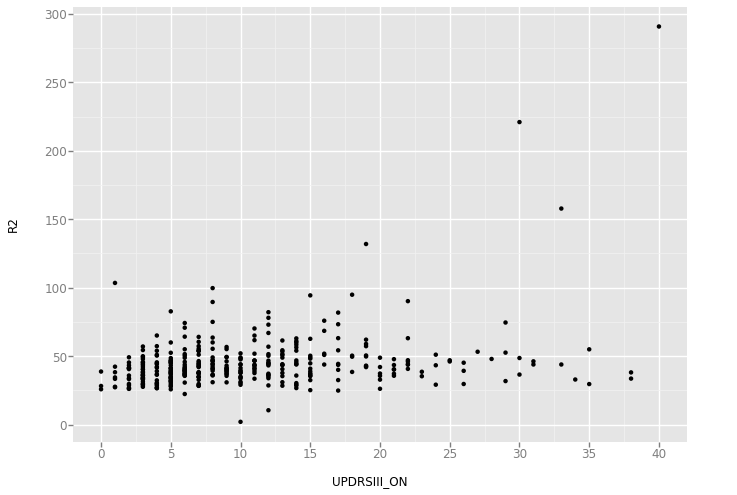

<ggplot: (8746193044781)>

In [211]:
gg.qplot(df_R2[1],df_R2[22]) + gg.xlab('UPDRSIII_ON') + gg.ylab('R2') # gg.geom_smooth(color="blue")

In [157]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
data = val

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=0)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

TypeError: zip argument #2 must support iteration

In [161]:
print(len(data))
np.random.seed(19680801)
data2 = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]
print(data2[0])
print

396
[-3.1218385277506142, -2.262283088410026, -1.884697692756784, -1.7155547851607309, -1.5158787721745357, -1.4100881944025381, -1.3584770112725197, -1.3207765603350463, -1.2738157597155664, -1.23738910381811, -1.2307870529506515, -1.2269977854322833, -1.1961980903270952, -1.1275021170675945, -1.1232790206733962, -1.1183151725303673, -1.1146046653680219, -1.1106089767371721, -1.0904711851280051, -0.96486356448105437, -0.95364446653305612, -0.89892779984412163, -0.80934479346010046, -0.74972665959341001, -0.70259084754654444, -0.64928811684158561, -0.6071839128156995, -0.60321948179948792, -0.59716758190988561, -0.53636846713586772, -0.51931743599011415, -0.51744207446935742, -0.497319496500776, -0.48316060246183784, -0.48194437611005925, -0.47841957635794152, -0.43105068676608671, -0.30831923719054405, -0.27110514635905109, -0.26660834135989703, -0.25398405023828058, -0.22905115771553702, -0.21699692550435176, -0.1426382068941453, -0.12758733346403073, -0.1172265226167112, -0.05911741

# Conversion fichier Excel du CATI en fichier tsv

In [5]:
fh = open('/NAS/deathrow/protocoles/predistim/listePat.tsv')
reader = csv.reader(fh, delimiter = '\t')

wb = load_workbook(filename = '/NAS/deathrow/protocoles/predistim/test.xlsx')
sheet_ranges = wb['all_pat']
    
for ligne in reader:
    mySTR=ligne[0]+'\t'+ligne[1]+'\t'+ligne[2]
    for cpt in np.arange(1,700):
        cellU='A'+str(cpt)
        if (ligne[0] == sheet_ranges[cellU].value ) :
                if (sheet_ranges['E'+str(cpt)].value == 1) :
                    mySTR=mySTR+'\t'+'0'
                elif (sheet_ranges['F'+str(cpt)].value == 1) :
                     mySTR=mySTR+'\t'+'1'
                elif (sheet_ranges['G'+str(cpt)].value == 1) :
                     mySTR=mySTR+'\t'+'2'
                elif (sheet_ranges['H'+str(cpt)].value == 1) :
                     mySTR=mySTR+'\t'+'3'
                elif (sheet_ranges['I'+str(cpt)].value == 1) :
                     mySTR=mySTR+'\t'+'4'                
    print(mySTR)

01001SR	Male	67
01002TM	Male	59
01003SJ	Male	61
01004DJ	Female	65
01005LB	Male	65
01006DF	Male	51
01007HC	Male	66
01008GM	Female	45
01009WF	Female	64
01010VD	Female	66	4
01011BB	Female	51	2
01012BB	Female	57	4
01013RP	Male	63	3
01014DE	Female	57	2
01015HC	Female	52	0
01016BP	Female	52	0
01017TA	Male	56	0
01018MT	Male	50	0	0
01019LJ	Male	46	0
01020VM	Male	61	0
01021CT	Male	57	4
01022FZ	Female	57	4
01023CF	Male	52	0
01024DC	Female	58	2
01025RE	Male	41	2
01026AF	Male	63	2
01027TM	Male	66	2
01028SA	Male	66	0
01029LL	Female	66	2
01030DM	Female	65
01031FB	Male	54	0
01032HM	Female	57	4
01033DG	Male	56	3
01034UG	Male	53	0
01035RM	Female	63	4
01037DA	Male	36	2
01038PG	Female	63	3
01039AC	Female	57	4
01040LC	Male	63	1
01041GR	Male	60	2
01042FP	Male	57	4
01043GC	Female	57	4
01044SD	Male	59	2
01045TP	Female	57	3
01046AA	Female	45	0
02001VE	Male	59
02003SJ	Male	53	0
02004GB	Male	45	0
02005MJ	Male	72	4
02006DP	Female	57	0
02007ST	Male	53	0
02008BL	Male	51	0
02009LP	Male	67	2
02010DP	Female	58	4
0201

In [71]:
fh = open('/NAS/deathrow/protocoles/predistim/listePat.tsv')
reader = csv.reader(fh, delimiter = '\t')

wb = load_workbook(filename = '/NAS/deathrow/protocoles/predistim/QC_predistim_IRM.xlsx')
    
for ligne in reader:
    mySTR=ligne[0]+'\t'+ligne[1]+'\t'+ligne[2]
    
    if (ligne[0][0:2]=='01') :
        sheet_ranges = wb['Lille']
    elif (ligne[0][0:2]=='02') :
        sheet_ranges = wb['Paris']
    elif (ligne[0][0:2]=='04') :
        sheet_ranges = wb['Nantes'] 
    elif (ligne[0][0:2]=='05') :
        sheet_ranges = wb['Clermont']
    elif (ligne[0][0:2]=='06') :
        sheet_ranges = wb['Marseille']
    elif (ligne[0][0:2]=='07') :
        sheet_ranges = wb['Poitiers']
    elif (ligne[0][0:2]=='08') :
        sheet_ranges = wb['Rennes']
    elif (ligne[0][0:2]=='09') :
        sheet_ranges = wb['Bordeaux']
    elif (ligne[0][0:2]=='10') :
        sheet_ranges = wb['Toulouse']
    elif (ligne[0][0:2]=='11') :
        sheet_ranges = wb['Rouen']
    elif (ligne[0][0:2]=='13') :
        sheet_ranges = wb['Strasbourg']
    elif (ligne[0][0:2]=='14') :
        sheet_ranges = wb['Nice']
    elif (ligne[0][0:2]=='15') :
        sheet_ranges = wb['Amiens']
    elif (ligne[0][0:2]=='17') :
        sheet_ranges = wb['Lyon']
    elif (ligne[0][0:2]=='18') :
        sheet_ranges = wb['Nancy']
    elif (ligne[0][0:2]=='19') :
        sheet_ranges = wb['Rothschild']
    elif (ligne[0][0:2]=='20') :
        sheet_ranges = wb['Foch']
    
    for cpt in np.arange(1,100):
        cellU='A'+str(cpt)
        if (ligne[0] == sheet_ranges[cellU].value ) :
                if (sheet_ranges['K'+str(cpt)].value == 1) :
                    mySTR=mySTR+'\t'+'5'
                elif (sheet_ranges['L'+str(cpt)].value == 1) :
                     mySTR=mySTR+'\t'+'4'
                elif (sheet_ranges['M'+str(cpt)].value == 1) :
                     mySTR=mySTR+'\t'+'3'
                elif (sheet_ranges['N'+str(cpt)].value == 1) :
                     mySTR=mySTR+'\t'+'2'
                elif (sheet_ranges['O'+str(cpt)].value == 1) :
                     mySTR=mySTR+'\t'+'1'
                else :
                     mySTR=mySTR+'\t'+'0'       

                if (sheet_ranges['T'+str(cpt)].value == 1) :
                    mySTR=mySTR+'\t'+'5'
                elif (sheet_ranges['U'+str(cpt)].value == 1) :
                     mySTR=mySTR+'\t'+'4'
                elif (sheet_ranges['V'+str(cpt)].value == 1) :
                     mySTR=mySTR+'\t'+'3'
                elif (sheet_ranges['W'+str(cpt)].value == 1) :
                     mySTR=mySTR+'\t'+'2'
                elif (sheet_ranges['X'+str(cpt)].value == 1) :
                     mySTR=mySTR+'\t'+'1'
                else :
                     mySTR=mySTR+'\t'+'0'                           
                
    print mySTR

01001SR	Male	67	5	0
01002TM	Male	59	5	0
01003SJ	Male	61	1	0
01004DJ	Female	65	3	0
01005LB	Male	65	3	0
01006DF	Male	51	5	0
01007HC	Male	66	3	0
01008GM	Female	45	3	0
01009WF	Female	64	3	0
01010VD	Female	66	5	1
01011BB	Female	51	5	3
01012BB	Female	57	3	1
01013RP	Male	63	3	2
01014DE	Female	57	5	3
01015HC	Female	52	5	5
01016BP	Female	52	3	5
01017TA	Male	56	5	5
01018MT	Male	50	5	5	5	5
01019LJ	Male	46	5	5
01020VM	Male	61	5	5
01021CT	Male	57	3	1
01022FZ	Female	57	3	1
01023CF	Male	52	5	5
01024DC	Female	58	5	3
01025RE	Male	41	3	3
01026AF	Male	63	5	3
01027TM	Male	66	5	3
01028SA	Male	66	5	5
01029LL	Female	66	5	3
01030DM	Female	65
01031FB	Male	54	5	5
01032HM	Female	57	3	1
01033DG	Male	56	3	2
01034UG	Male	53	5	5
01035RM	Female	63	3	1
01037DA	Male	36	5	3
01038PG	Female	63	3	2
01039AC	Female	57	5	1
01040LC	Male	63	5	4
01041GR	Male	60	1	3
01042FP	Male	57	5	1
01043GC	Female	57	5	1
01044SD	Male	59	5	3
01045TP	Female	57	3	2
01046AA	Female	45	5	5
02001VE	Male	59	3	0
02003SJ	Male	53	5	5
02004GB	Male	45	5	5


In [237]:
from ggplot import *
#AGE=[67,59,61,65,65,66,45,64,66,51,57,57,52,52,56,50,46,61,57,57,52,58,41,63,66,66,66,65,54,57,56,53,36,63,57,63,60,57,57,59,57,45,53,45,57,53,51,67,58,59,64,70,63,53,50,50,37,57,69,47,66,66,51,49,59,50,61,70,65,63,69,65,70,60,68,52,66,57,63,60,58,58,70,57,56,55,63,68,62,63,62,60,61,57,68,66,49,58,57,66,53,64,73,61,56,44,66,64,64,64,69,55,65,63,63,61,55,69,66,60,55,69,46,58,57,59,61,70,67,46,58,62,51,65,71,63,67,60,59,65,61,72,51,67,66,62,65,49,56,62,60,60,68,66,45,67,56,65,65,65,54,54,58,70,69,69,65,55,67,60,68,66,65,70,57,68,63,64,62,46,56,61,61,73,68,62,66,57,62,62,63,55,61,67,48,57,68,49,66,65,68,60,59,65,54,53,61,62,63,61,59,51,50,68,62,64,69,54,60,65,65,66,70,48,43,63,66,65,52,53,50,52,69,66,62,49,59,61,66,46,66,61,67,68,64,64,49,61,61,52,57,57,65,66,64,55,65,46,68,53,50,65,65,54,66,69,69,69,69,66,53,58,53,73,54,63,66,49,68,67,62,62,65,68,69,67,55,66,53,66,66,67,69,68,66,53,47,68,63,68,58,59,58,60,49,52,59,48,64,66,63,39,63,60,69,56,30,62,67,63,61,62,69,69,55,67,68,64,62,57,67,65,65,66,66,66,67,65,59,54,59,52,44,69,69,54,58,66,62,68,55,66,62,56,47,61,58,54,61,67,56,55,54,50,57,68,50,52,63,70,70,69,53,64,61,62,69,60,64,66,65,67,59,52,57,70,67,55,57,69,65,65,68,69,58,58,67,59,61,65,65,66,45,64,66,51,57,57,52,52,56,50,46,61,57,57,52,58,41,63,66,66,66,65,54,57,56,53,36,63,57,63,60,57,57,59,57,45,53,45,57,53,51,67,58,59,64,70,63,53,50,50,37,57,69,47,66,66,51,49,59,50,61,70,65,63,69,65,70,60,68,52,66,57,63,60,58,58,70,57,56,55,63,68,62,63,62,60,61,57,68,66,49,58,57,66,53,64,73,61,56,44,66,64,64,64,69,55,65,63,63,61,55,69,66,60,55,69,46,58,57,59,61,70,67,46,58,62,51,65,71,63,67,60,59,65,61,72,51,67,66,62,65,49,56,62,60,60,68,66,45,67,56,65,65,65,54,54,58,70,69,69,65,55,67,60,68,66,65,70,57,68,63,64,62,46,56,61,61,73,68,62,66,57,62,62,63,55,61,67,48,57,68,49,66,65,68,60,59,65,54,53,61,62,63,61,59,51,50,68,62,64,69,54,60,65,65,66,70,48,43,63,66,65,52,53,50,52,69,66,62,49,59,61,66,46,66,61,67,68,64,64,49,61,61,52,57,57,65,66,64,55,65,46,68,53,50,65,65,54,66,69,69,69,69,66,53,58,53,73,54,63,66,49,68,67,62,62,65,68,69,67,55,66,53,66,66,67,69,68,66,53,47,68,63,68,58,59,58,60,49,52,59,48,64,66,63,39,63,60,69,56,30,62,67,63,61,62,69,69,55,67,68,64,62,57,67,65,65,66,66,66,67,65,59,54,59,52,44,69,69,54,58,66,62,68,55,66,62,56,47,61,58,54,61,67,56,55,54,50,57,68,50,52,63,70,70,69,53,64,61,62,69,60,64,66,65,67,59,52,57,70,67,55,57,69,65,65,68,69,58,58]
#R2=[44,76,37,59,37,1,27,4,31,30,31,33,33,30,32,31,28,34,28,31,31,31,27,34,31,32,30,30,30,34,28,33,33,41,32,32,91,32,37,26,31,31,31,32,37,29,31,28,29,31,28,26,27,28,28,27,27,30,28,29,31,31,29,32,30,30,27,50,30,33,38,33,32,29,28,34,29,32,32,28,29,30,30,30,28,28,30,28,33,29,32,31,28,34,33,32,30,31,29,31,31,33,47,27,34,28,28,36,32,34,31,30,28,31,29,31,32,29,46,26,29,29,31,27,32,36,28,28,30,30,30,29,30,34,34,28,29,33,31,29,31,31,30,28,29,30,35,31,28,32,27,28,30,30,29,34,30,30,29,28,29,30,28,33,29,33,28,31,28,31,32,30,28,34,30,36,29,33,32,29,28,31,33,31,32,29,32,39,29,30,31,31,32,31,32,30,27,28,40,32,41,30,31,27,27,29,33,29,30,34,30,31,41,29,31,32,29,34,33,29,34,28,32,29,28,28,34,30,30,29,27,37,36,31,31,29,31,3,30,27,30,29,30,29,34,30,31,30,31,29,29,31,29,30,33,29,33,28,32,29,31,34,32,36,31,32,34,36,32,28,32,31,29,30,37,35,36,34,38,34,32,33,33,31,31,42,35,44,34,31,30,35,40,29,36,33,32,33,30,32,31,34,35,32,36,33,32,31,33,55,34,31,35,36,34,32,29,30,36,31,31,33,31,31,32,31,29,35,35,33,36,34,34,35,29,38,33,35,30,38,49,32,32,34,41,35,33,35,33,32,28,31,31,29,32,34,29,33,29,36,29,30,33,30,31,33,32,29,27,32,31,35,31,32,29,39,31,34,33,35,32,29,31,34,39,43,35,30,30,31,31,30,29,33,31,32,48,64,43,51,45,1,24,4,30,27,33,30,35,34,33,30,28,40,31,28,30,30,29,33,31,30,29,32,30,34,27,34,32,38,32,32,54,30,31,187,30,31,31,31,35,29,30,32,30,30,28,27,26,27,28,26,27,34,29,27,30,30,29,29,32,31,28,50,30,31,33,33,32,29,27,35,27,31,32,29,31,30,31,30,28,29,29,29,31,30,33,33,29,33,34,32,29,32,29,32,31,80,39,26,31,29,28,35,31,34,30,30,29,31,31,31,32,31,37,26,29,29,32,30,31,32,27,29,29,30,31,30,31,33,30,27,28,30,31,28,29,33,30,29,29,29,35,30,27,31,27,29,29,28,29,31,30,30,27,29,30,28,28,33,30,31,28,32,28,30,30,30,29,35,32,36,30,31,33,29,28,31,32,31,31,29,31,36,29,30,30,30,30,29,33,28,28,30,35,30,41,29,30,28,27,29,33,29,30,31,29,30,37,27,28,31,31,34,31,29,31,29,31,28,28,29,33,31,29,28,28,37,34,30,30,30,30,3,29,27,29,28,30,29,34,30,28,33,33,29,29,32,29,29,31,31,33,27,33,30,30,35,31,34,30,33,34,35,34,29,34,31,31,29,37,32,37,30,38,36,31,33,37,31,32,41,33,40,30,31,35,35,40,29,35,35,31,33,30,32,33,33,36,33,38,32,31,32,33,51,34,31,35,33,36,32,29,29,31,33,32,31,32,32,34,30,29,31,36,33,35,31,34,26,31,38,31,33,30,36,44,37,31,33,49,36,34,33,33,30,29,34,32,30,32,34,29,35,30,34,29,31,32,29,32,33,31,31,29,35,31,37,31,34,28,30,32,32,31,35,32,31,30,33,37,40,37,31,30,34,30,29,29,34,34,32]

df_R2age = pd.read_csv(DIR+'R2_age_final.csv',sep = ';')
df_R2age.describe()



,AGE,R2
count,792.000000,792.000000
mean,60.414141,31.891414
std,7.130370,4.724879
min,30.000000,24.000000
25%,56.000000,29.000000
50%,62.000000,31.000000
75%,66.000000,33.000000
max,73.000000,80.000000


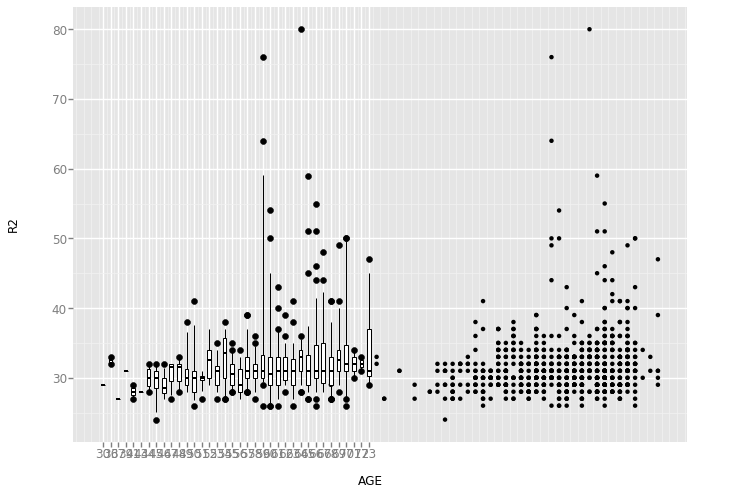

<ggplot: (8746193091085)>

In [257]:
ggplot(df_R2age,aes(x='AGE', y='R2'))+geom_boxplot()+geom_jitter(width=0.2)#(aes(group = cut_width(AGE,5)))

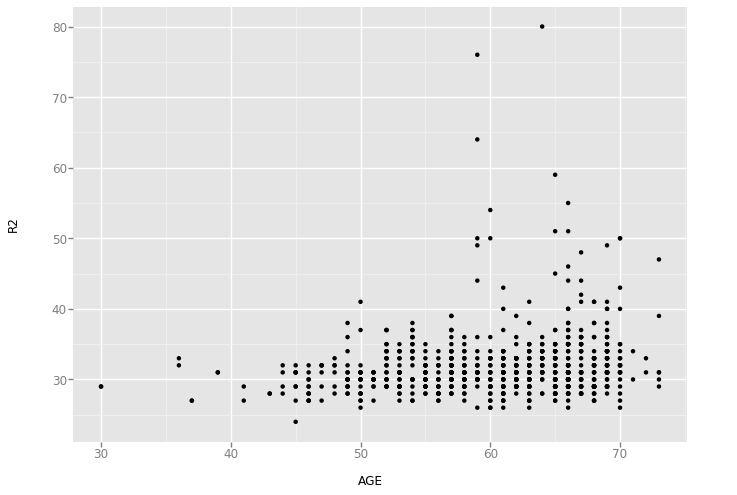

<ggplot: (8746194226937)>

In [248]:
ggplot(df_R2age,aes(x='AGE', y='R2'))+geom_point()

In [195]:
df_R2_QSM = pd.read_csv(DIR+'corr_R2_QSM.txt',index_col=1,sep = '\t')
print(df_R2_QSM.describe())
std_good=df_R2_QSM.query('STD > 12 and STD < 43')
print(std_good.describe())

                STD  R2 Left ventricle  R2  Right ventricle  R2 Left caudate  \
count  2.550000e+02         255.000000           255.000000       255.000000   
mean   3.596240e+06          23.565978            23.774303        29.601196   
std    1.451664e+07           4.460336             4.450169         5.426838   
min    1.639909e+00           4.391807             4.248898         2.516662   
25%    1.886235e+01          22.055211            21.936317        28.249283   
50%    2.542515e+01          23.051380            23.147040        29.518819   
75%    5.194982e+01          24.805825            25.314090        30.610070   
max    1.276283e+08          64.036089            63.050023        70.142759   

       R2 Right caudate  R2 Left putamen  R2 Right putamen  R2 Left thalamus  \
count        255.000000       255.000000        255.000000        255.000000   
mean          29.432004        32.652597         32.653717         29.161896   
std            4.695710         7.37826

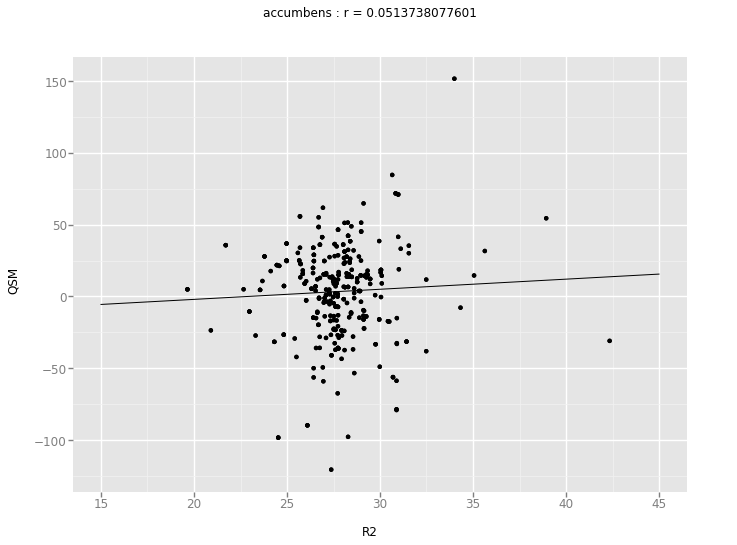

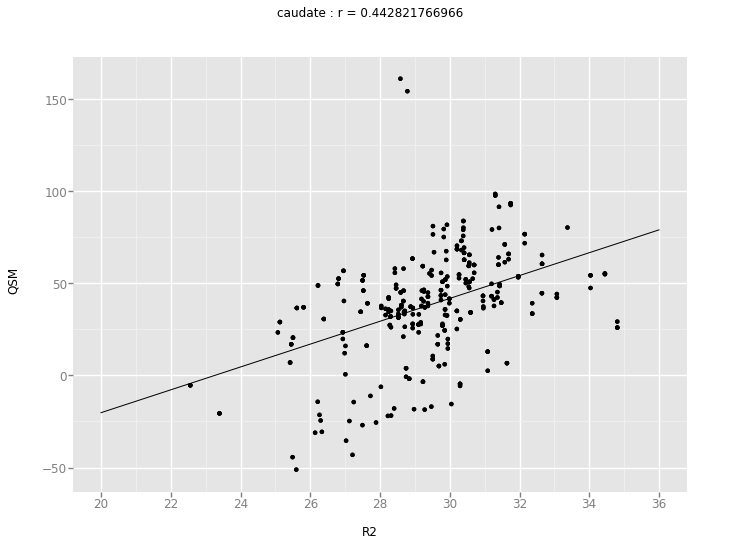

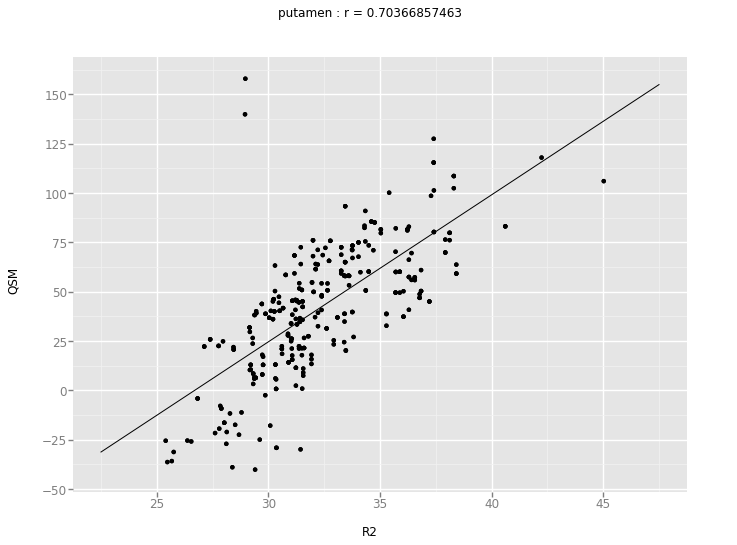

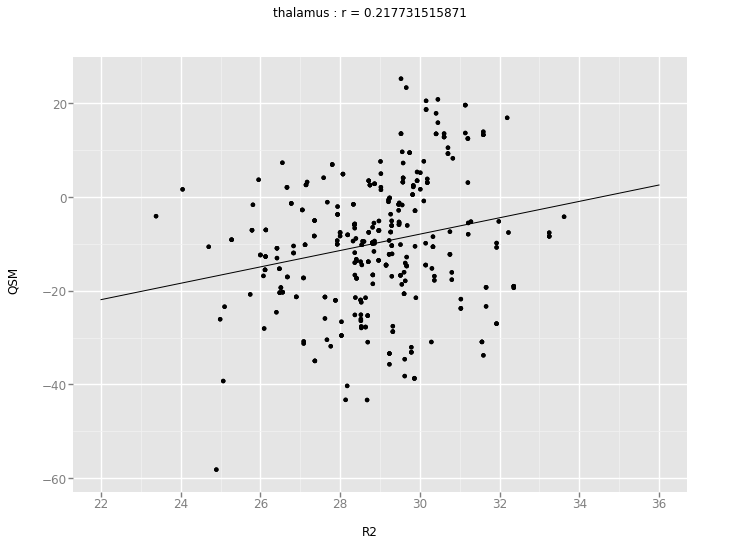

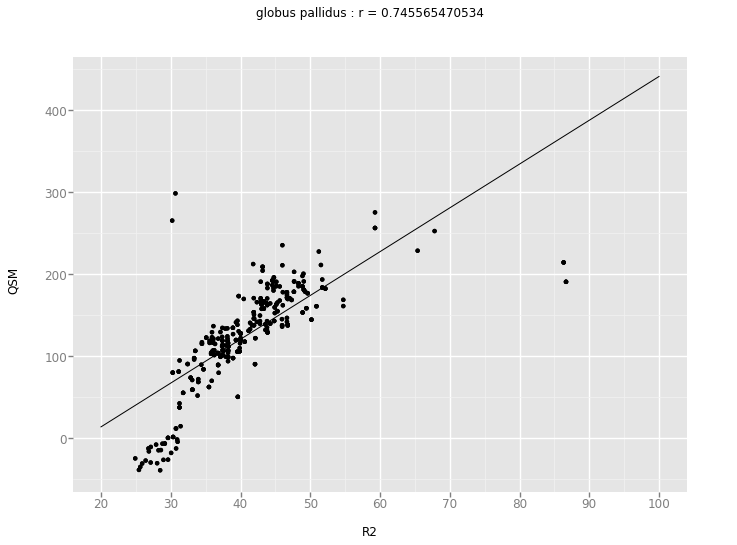

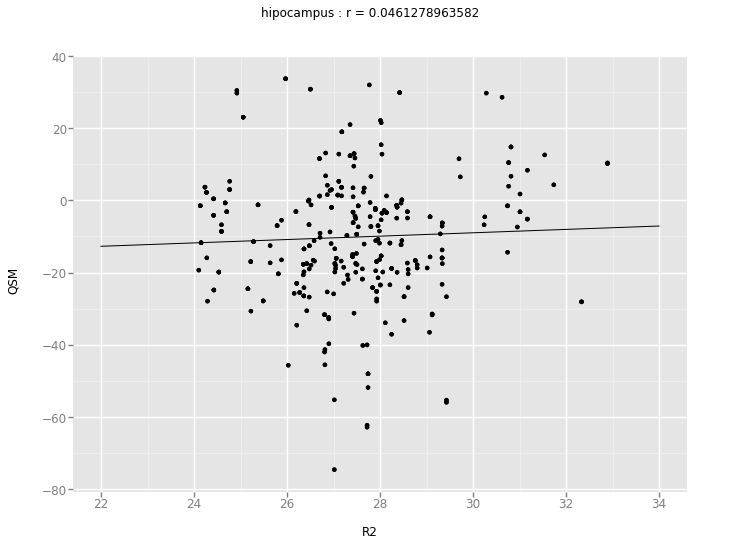

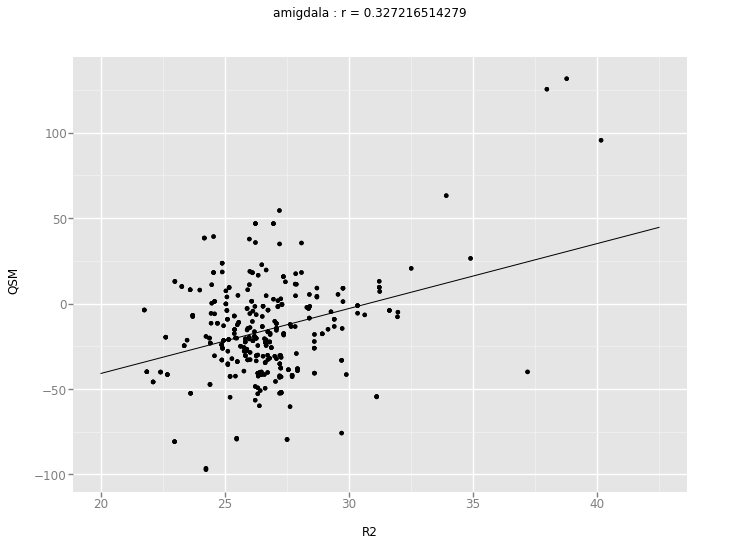

In [201]:
#ROI=
for ROI in ['accumbens','caudate','putamen','thalamus','globus pallidus','hipocampus','amigdala' ]:
    X=pd.concat([std_good['R2 Left '+str(ROI)],std_good['R2 Right '+str(ROI)]], ignore_index=True)
    Y=pd.concat([std_good['QSM Left '+str(ROI)],std_good['QSM Right '+str(ROI)]], ignore_index=True)
    #print(X.describe())
    #print(Y.describe())
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plot=gg.qplot(X,Y)\
    +gg.geom_point()\
    +gg.xlab('R2')+gg.ylab('QSM')+gg.ggtitle(str(ROI)+' : r = '+str(r_value))\
    +gg.geom_abline(intercept=intercept,slope=slope)
    plot.show()
    plot.save(DIR+'screenshots/R2_QSM_corr/'+ROI+'.tiff',dpi = 300)

In [ ]:
import cmath
phase(complex(-1.0,0.0))